In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Plot settings
plt.style.use('default')
sns.set_palette("husl")

print("Setup complete!")

Setup complete!


In [2]:
 # List all files in your data directory
data_path = 'data/raw'

print("Files in data/raw:")
print("="*50)
for file in os.listdir(data_path):
    if file.endswith('.csv'):
        filepath = os.path.join(data_path, file)
        size_mb = os.path.getsize(filepath) / (1024*1024)
        print(f"{file:<30} ({size_mb:.2f} MB)")

Files in data/raw:
teams.csv                      (0.00 MB)
players.csv                    (0.25 MB)
games.csv                      (3.92 MB)
ranking.csv                    (14.73 MB)
games_details.csv              (88.77 MB)


In [3]:
# Load games data 
games = pd.read_csv(f'{data_path}/games.csv')
print(f"\nDataset Shape: {games.shape[0]:,} rows × {games.shape[1]} columns")


Dataset Shape: 26,651 rows × 21 columns


In [4]:
print("COLUMN NAMES:")
print("="*60)
for i, col in enumerate(games.columns, 1):
    print(f"{i:2d}. {col}")

COLUMN NAMES:
 1. GAME_DATE_EST
 2. GAME_ID
 3. GAME_STATUS_TEXT
 4. HOME_TEAM_ID
 5. VISITOR_TEAM_ID
 6. SEASON
 7. TEAM_ID_home
 8. PTS_home
 9. FG_PCT_home
10. FT_PCT_home
11. FG3_PCT_home
12. AST_home
13. REB_home
14. TEAM_ID_away
15. PTS_away
16. FG_PCT_away
17. FT_PCT_away
18. FG3_PCT_away
19. AST_away
20. REB_away
21. HOME_TEAM_WINS


In [5]:
print("\nFIRST 5 GAMES:")
print("="*60)
games.head(5)


FIRST 5 GAMES:


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [9]:
print("\nBASIC STATISTICS:")
print("="*60)
stat_cols = ['FG_PCT_home', 'FG_PCT_away', 'PTS_home', 'PTS_away', 
             'REB_home', 'REB_away', 'AST_home', 'AST_away']

print(games[stat_cols].describe())



BASIC STATISTICS:
        FG_PCT_home   FG_PCT_away      PTS_home      PTS_away      REB_home  \
count  26552.000000  26552.000000  26552.000000  26552.000000  26552.000000   
mean       0.460735      0.449732    103.455898    100.639876     43.374284   
std        0.056676      0.055551     13.283370     13.435868      6.625769   
min        0.250000      0.244000     36.000000     33.000000     15.000000   
25%        0.422000      0.412000     94.000000     91.000000     39.000000   
50%        0.460000      0.449000    103.000000    100.000000     43.000000   
75%        0.500000      0.487000    112.000000    110.000000     48.000000   
max        0.684000      0.687000    168.000000    168.000000     72.000000   

           REB_away      AST_home      AST_away  
count  26552.000000  26552.000000  26552.000000  
mean      42.113249     22.823441     21.496271  
std        6.533039      5.193308      5.160596  
min       19.000000      6.000000      4.000000  
25%       38.000000

In [7]:
# Missing values
missing = games.isnull().sum()
missing_pct = (missing / len(games)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_pct
})

print("MISSING VALUES:")
print("="*60)
print(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))


MISSING VALUES:
              Missing_Count  Missing_Percent
PTS_home                 99         0.371468
FG_PCT_home              99         0.371468
FT_PCT_home              99         0.371468
FG3_PCT_home             99         0.371468
AST_home                 99         0.371468
REB_home                 99         0.371468
PTS_away                 99         0.371468
FG_PCT_away              99         0.371468
FT_PCT_away              99         0.371468
FG3_PCT_away             99         0.371468
AST_away                 99         0.371468
REB_away                 99         0.371468



GAMES PER SEASON:
SEASON
2003    1385
2004    1362
2005    1432
2006    1419
2007    1411
2008    1425
2009    1424
2010    1422
2011    1104
2012    1420
2013    1427
2014    1418
2015    1416
2016    1405
2017    1382
2018    1378
2019    1241
2020    1249
2021    1389
2022     542
Name: count, dtype: int64


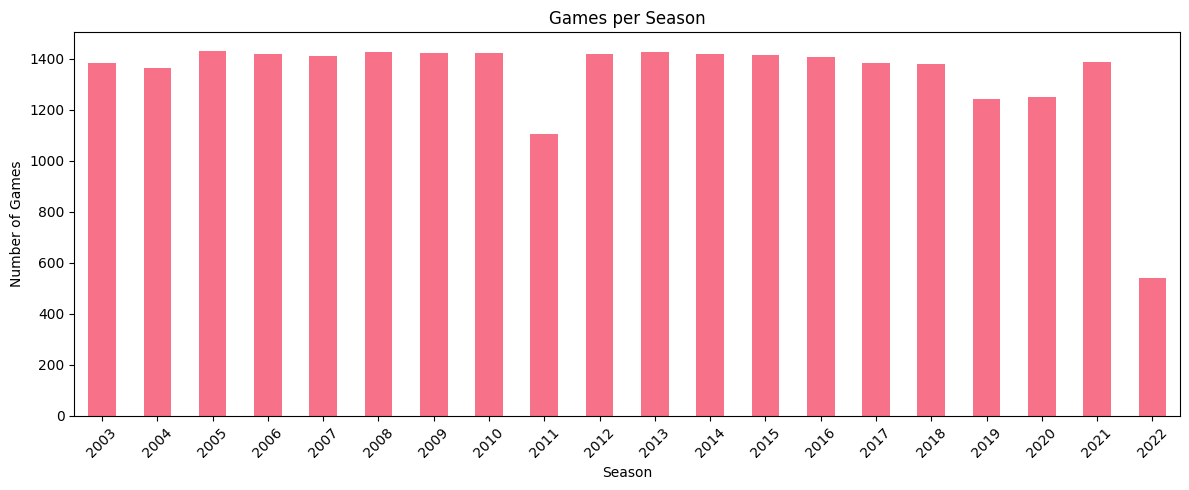

In [8]:
season_col = 'SEASON'

print("\nGAMES PER SEASON:")
print("="*60)
season_counts = games[season_col].value_counts().sort_index()
print(season_counts)

# Visualize
plt.figure(figsize=(12, 5))
season_counts.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Games')
plt.title('Games per Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
